In [1]:
pip install pybaseball

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import initial libraries

import pybaseball
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

/Users/kishan/Documents/Documents/IST 707 Applied Machine Learning/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
#We use pybaseball data and split it in regular and post season dataframes
df_reg = pybaseball.statcast(start_dt = '2023-03-30', end_dt = '2023-10-02')
df_post = pybaseball.statcast(start_dt = '2023-10-03', end_dt = '2023-11-01')

This is a large query, it may take a moment to complete


/Users/kishan/Documents/Documents/IST 707 Applied Machine Learning/venv/lib/python3.9/site-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
100%|█████████████████████████████████████████| 187/187 [01:25<00:00,  2.18it/s]
/Users/kishan/Documents/Documents/IST 707 Applied Machine Learning/venv/lib/python3.9/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concat

This is a large query, it may take a moment to complete


100%|███████████████████████████████████████████| 30/30 [00:03<00:00,  8.37it/s]
/Users/kishan/Documents/Documents/IST 707 Applied Machine Learning/venv/lib/python3.9/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


In [4]:
#We handpicked columns that we felt did not convey much information or were repeated
#After this, we ended up with 32 columns that we will use in our analyses

df_reg = df_reg.drop(['game_date', 'spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated', 'break_length_deprecated',
                 'des', 'game_year', 'inning_topbot', 'hc_x', 'hc_y', 'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2',
                 'umpire', 'sv_id', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'effective_speed',
                 'release_extension', 'release_pos_y', 'babip_value', 'woba_denom', 'woba_value', 'iso_value',
                 'bat_score', 'fld_score', 'post_away_score', 'post_home_score', 'post_bat_score', 'post_fld_score',
                 'spin_axis', 'release_speed', 'events', 'description', 'zone', 'game_type', 'hit_location', 'bb_type',
                  'pfx_x', 'pfx_z', 'plate_x', 'plate_z','hit_distance_sc', 'launch_speed', 'launch_angle', 'release_spin_rate', 'estimated_ba_using_speedangle',
                  'estimated_woba_using_speedangle', 'launch_speed_angle', 'delta_home_win_exp', 'delta_run_exp', 'pitch_type'], axis = 1)
df_post = df_post.drop(['game_date', 'spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated', 'break_length_deprecated',
                 'des', 'game_year', 'inning_topbot', 'hc_x', 'hc_y', 'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2',
                 'umpire', 'sv_id', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'effective_speed',
                 'release_extension', 'release_pos_y', 'babip_value', 'woba_denom', 'woba_value', 'iso_value',
                 'bat_score', 'fld_score', 'post_away_score', 'post_home_score', 'post_bat_score', 'post_fld_score',
                 'spin_axis', 'release_speed', 'events', 'description', 'zone', 'game_type', 'hit_location', 'bb_type',
                  'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'hit_distance_sc', 'launch_speed', 'launch_angle', 'release_spin_rate', 'estimated_ba_using_speedangle',
                  'estimated_woba_using_speedangle', 'launch_speed_angle', 'delta_home_win_exp', 'delta_run_exp', 'pitch_type'], axis = 1)

In [5]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717945 entries, 2371 to 4506
Data columns (total 34 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   release_pos_x          717599 non-null  Float64
 1   release_pos_z          717599 non-null  Float64
 2   player_name            717945 non-null  object 
 3   batter                 717945 non-null  Int64  
 4   pitcher                717945 non-null  Int64  
 5   stand                  717945 non-null  object 
 6   p_throws               717945 non-null  object 
 7   home_team              717945 non-null  object 
 8   away_team              717945 non-null  object 
 9   type                   717945 non-null  object 
 10  balls                  717945 non-null  Int64  
 11  strikes                717945 non-null  Int64  
 12  on_3b                  69419 non-null   Int64  
 13  on_2b                  137481 non-null  Int64  
 14  on_1b                  221293 non-null  

In [6]:
#We use 14 pitchers that will also be playing in the postseason to filter out our data

df_reg_filtered = df_reg[df_reg['pitcher'].isin([605400, 554430,624133,543135,668678,656756,518876,694297,434378,664285,664299,675911,543243,641154])]
df_post_filtered = df_post[df_post['pitcher'].isin([605400, 554430,624133,543135,668678,656756,518876,694297,434378,664285,664299,675911,543243,641154])]

In [7]:
#Deleting two rows that had pitch_type as NaN which might cause an issue later
df_reg_filtered = df_reg_filtered[~df_reg_filtered.pitch_name.isin([np.nan])]

In [8]:
#First, we look at the different pitch types that these pitchers throw
pitch_name_counts = df_reg['pitch_name'].value_counts()

Text(0, 0.5, 'Count')

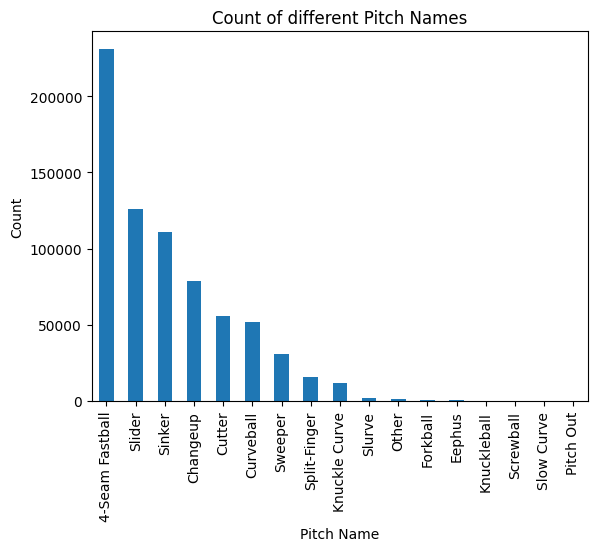

In [9]:
#We plot a count graph for the different types of pitches
pitch_name_counts.plot(kind="bar")
plot.title("Count of different Pitch Names")
plot.xlabel("Pitch Name")
plot.ylabel("Count")

<Axes: xlabel='type'>

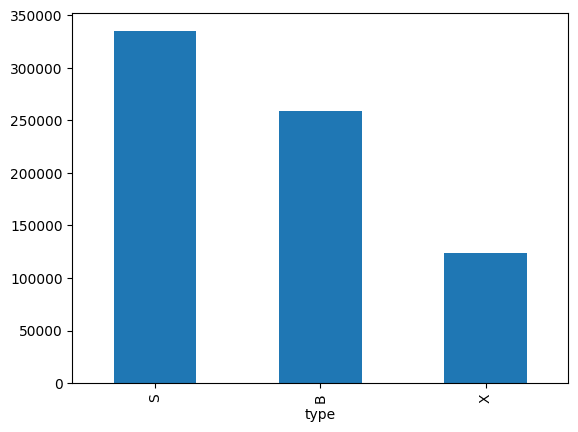

In [10]:
df_reg['type'].value_counts().plot(kind="bar")

In [11]:
#Next, we divide the pitches for each individual pitcher

cross_tab_prop = pd.crosstab(index=df_reg_filtered['player_name'],
                             columns=df_reg_filtered['pitch_name'],
                             normalize="index")
cross_tab = pd.crosstab(index=df_reg_filtered['player_name'],
                        columns=df_reg_filtered['pitch_name'])
cross_tab

pitch_name,4-Seam Fastball,Changeup,Curveball,Cutter,Knuckle Curve,Pitch Out,Sinker,Slider,Slow Curve,Split-Finger,Sweeper
player_name,,,,,,,,,,,
"Eovaldi, Nathan",831,0,301,393,0,0,0,90,0,617,0
"Gallen, Zac",1601,453,0,333,738,0,12,111,0,0,0
"Gray, Sonny",766,188,473,370,0,0,442,0,3,0,576
"Javier, Cristian",1682,119,0,0,217,0,0,864,0,0,0
"Kelly, Merrill",842,648,308,508,0,0,342,155,0,0,0
"López, Pablo",1043,638,377,0,0,0,320,0,0,0,646
"Montgomery, Jordan",312,671,647,45,0,0,1245,0,0,0,0
"Nola, Aaron",904,390,0,230,977,0,586,0,0,0,0
"Pfaadt, Brandon",731,195,89,0,0,2,160,0,0,0,435


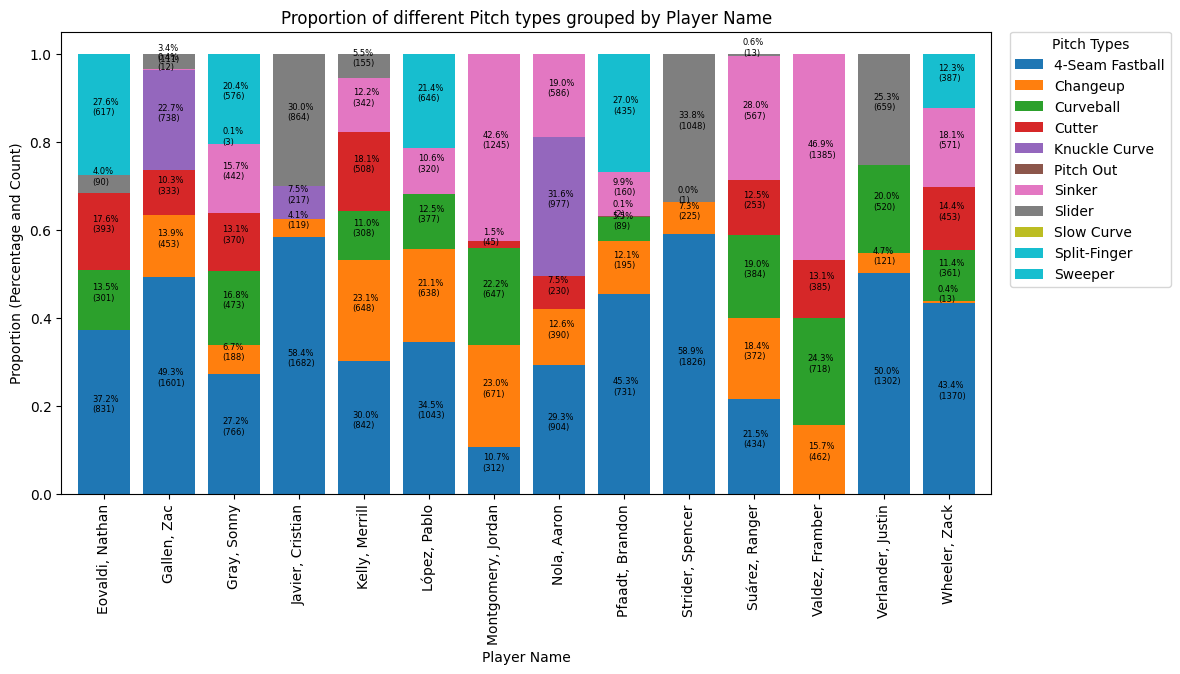

In [12]:
#Plotting the distribution of pitches for the 14 pitchers
cross_tab_prop.plot(kind='bar',
                    stacked=True,
                    colormap='tab10',
                    width=0.8,
                    figsize=(12, 6))

plot.title("Proportion of different Pitch types grouped by Player Name")
plot.xlabel("Player Name")
plot.ylabel("Proportion (Percentage and Count)")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
        if (proportion > 0):
            plot.text(x=n - 0.17,
                     y=(y_loc - proportion) + (proportion / 2),
                     s=f'{np.round(proportion * 100, 1)}%\n({count})',
                     color="black",
                     fontsize=6)
plot.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Pitch Types")
plot.show()

In [13]:
#We encode the data so that we can generate a heatmap for correlation of variables with the pitch type
encoded_data = df_reg.copy()
le = LabelEncoder()
#Using Label Encoder, change all categorical data types to numerical
for col in ['pitch_name', 'player_name', 'stand', 'p_throws', 'home_team', 'away_team',
             'type', 'pitch_name', 'if_fielding_alignment', 'of_fielding_alignment']:
    encoded_data[col] = le.fit_transform(df_reg[col])

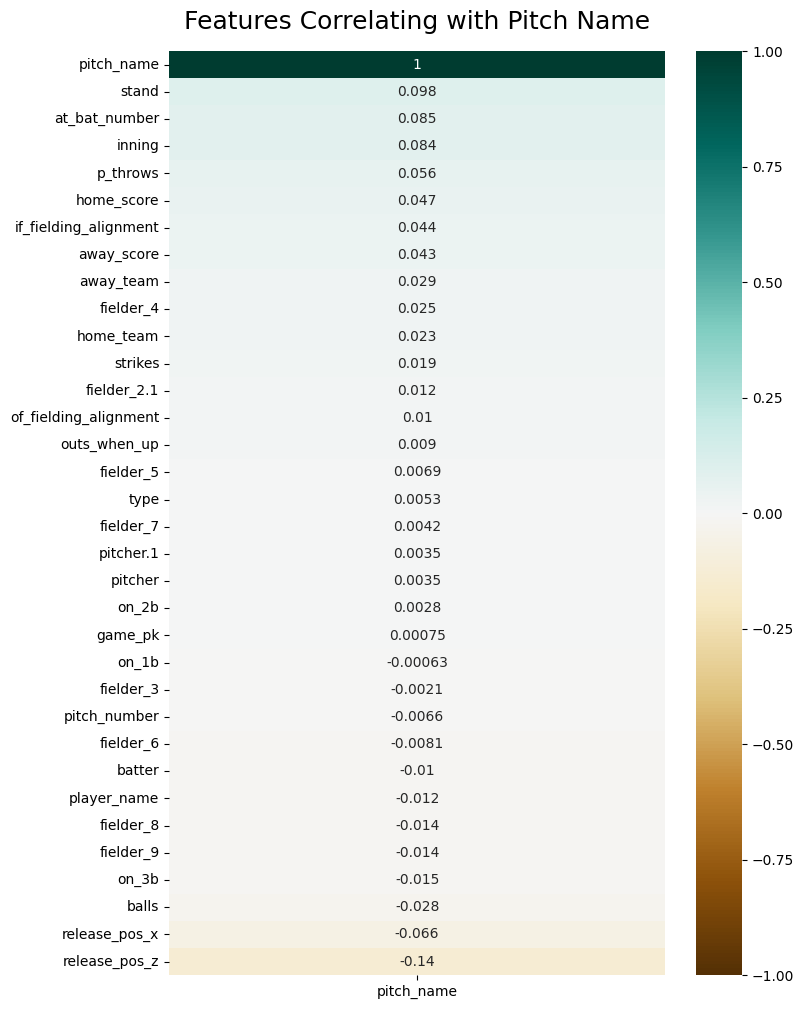

In [14]:
plot.figure(figsize=(8, 12))
heatmap = sns.heatmap(encoded_data.corr()[['pitch_name']].sort_values(by='pitch_name', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Pitch Name', fontdict={'fontsize':18}, pad=16);

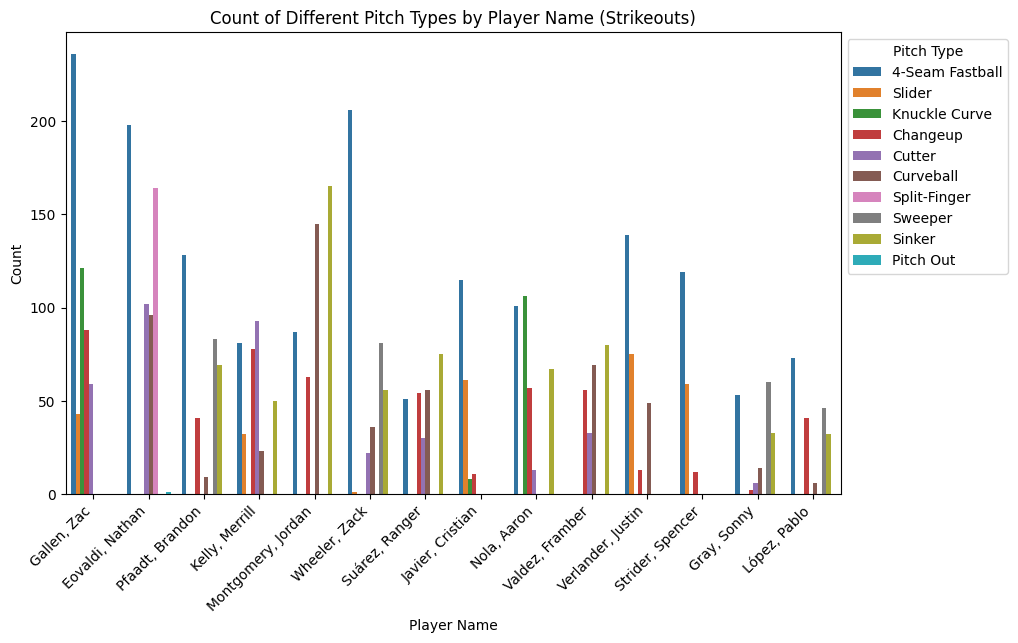

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='player_name', hue='pitch_name', data=df_post_filtered)
plt.title('Count of Different Pitch Types by Player Name (Strikeouts)')
plt.xlabel('Player Name')
plt.ylabel('Count')
plt.legend(title='Pitch Type', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.show()

In [16]:
#Divide the data into training and testing sets (regular season for the former, post season for latter)
X_train, y_train = df_reg_filtered.iloc[:,df_reg_filtered.columns!= 'pitch_name'], df_reg_filtered.iloc[:,df_reg_filtered.columns== 'pitch_name']
X_test, y_test = df_post_filtered.iloc[:,df_post_filtered.columns!= 'pitch_name'], df_post_filtered.iloc[:,df_post_filtered.columns== 'pitch_name']

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(38456, 33)
(38456, 1)
(4532, 33)
(4532, 1)


In [18]:
y_test

,pitch_name
14,4-Seam Fastball
17,Slider
19,Slider
20,4-Seam Fastball
22,Knuckle Curve
...,...
997,Sinker
1046,4-Seam Fastball
1078,4-Seam Fastball
1109,4-Seam Fastball


In [19]:
#Using Label Encoder, change all categorical data types to numerical
from sklearn.preprocessing import MinMaxScaler
le = LabelEncoder()

for col in ['player_name', 'stand', 'p_throws', 'home_team', 'away_team',
            'type', 'if_fielding_alignment', 'of_fielding_alignment']:
    X_train.loc[:,col] = le.fit_transform(X_train[col])
    X_test.loc[:,col] = le.fit_transform(X_test[col])
X_train.loc[:,'release_pos_x'] = MinMaxScaler().fit_transform(X_train[['release_pos_x']]).flatten()
X_train.loc[:,'release_pos_z'] = MinMaxScaler().fit_transform(X_train[['release_pos_z']]).flatten()
X_test.loc[:,'release_pos_x'] = MinMaxScaler().fit_transform(X_test[['release_pos_x']]).flatten()
X_test.loc[:,'release_pos_z'] = MinMaxScaler().fit_transform(X_test[['release_pos_z']]).flatten()

y_train = le.fit_transform(np.ravel(y_train))
y_test = le.fit_transform(np.ravel(y_test))

In [20]:
#Removing all nulls and filling them with 0. There are only 3 columns that contain null values
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [21]:
#Now, we create a covariance matrix that will be used for PCA
covar_matrix_train = np.matmul(X_train.T , X_train)

print ( "The shape of variance matrix = ", covar_matrix_train.shape)

The shape of variance matrix =  (33, 33)


In [22]:
#all columns are object types by default which causes an error in the eigh function. We convert them to float
covar_matrix_train = covar_matrix_train.apply(np.float64)
covar_matrix_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, release_pos_x to of_fielding_alignment
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   release_pos_x          33 non-null     float64
 1   release_pos_z          33 non-null     float64
 2   player_name            33 non-null     float64
 3   batter                 33 non-null     float64
 4   pitcher                33 non-null     float64
 5   stand                  33 non-null     float64
 6   p_throws               33 non-null     float64
 7   home_team              33 non-null     float64
 8   away_team              33 non-null     float64
 9   type                   33 non-null     float64
 10  balls                  33 non-null     float64
 11  strikes                33 non-null     float64
 12  on_3b                  33 non-null     float64
 13  on_2b                  33 non-null     float64
 14  on_1b                  33 non-null

In [23]:
from scipy.linalg import eigh

values_train, vectors_train = eigh(covar_matrix_train, subset_by_index=(31,32))
print("Shape of eigen vectors = ",vectors_train.shape)
vectors_train = vectors_train.T
print("Updated shape of eigen vectors = ",vectors_train.shape)

Shape of eigen vectors =  (33, 2)
Updated shape of eigen vectors =  (2, 33)


In [24]:
new_coordinates = np.matmul(vectors_train, X_train.T)

new_coordinates = np.vstack((new_coordinates, df_reg_filtered['pitch_name'])).T

# creating a new data frame for ploting the labeled points.
dataframe_pca = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "pitch_name"))
print(dataframe_pca.head())

   1st_principal   2nd_principal       pitch_name
0  413464.045195 -2102242.806629  4-Seam Fastball
1  413464.045196 -2102242.806628  4-Seam Fastball
2  413464.045196 -2102242.806626  4-Seam Fastball
3  413464.045196 -2102242.806624  4-Seam Fastball
4  413464.045197 -2102242.806623  4-Seam Fastball


<Figure size 1600x1600 with 0 Axes>

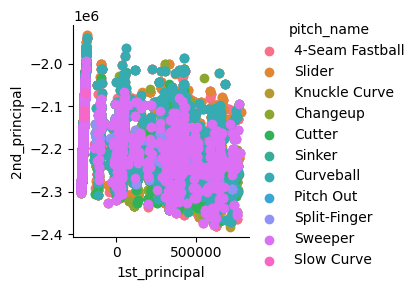

In [25]:
#2-D representation of the PCA

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))
sns.FacetGrid(dataframe_pca, hue="pitch_name").map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

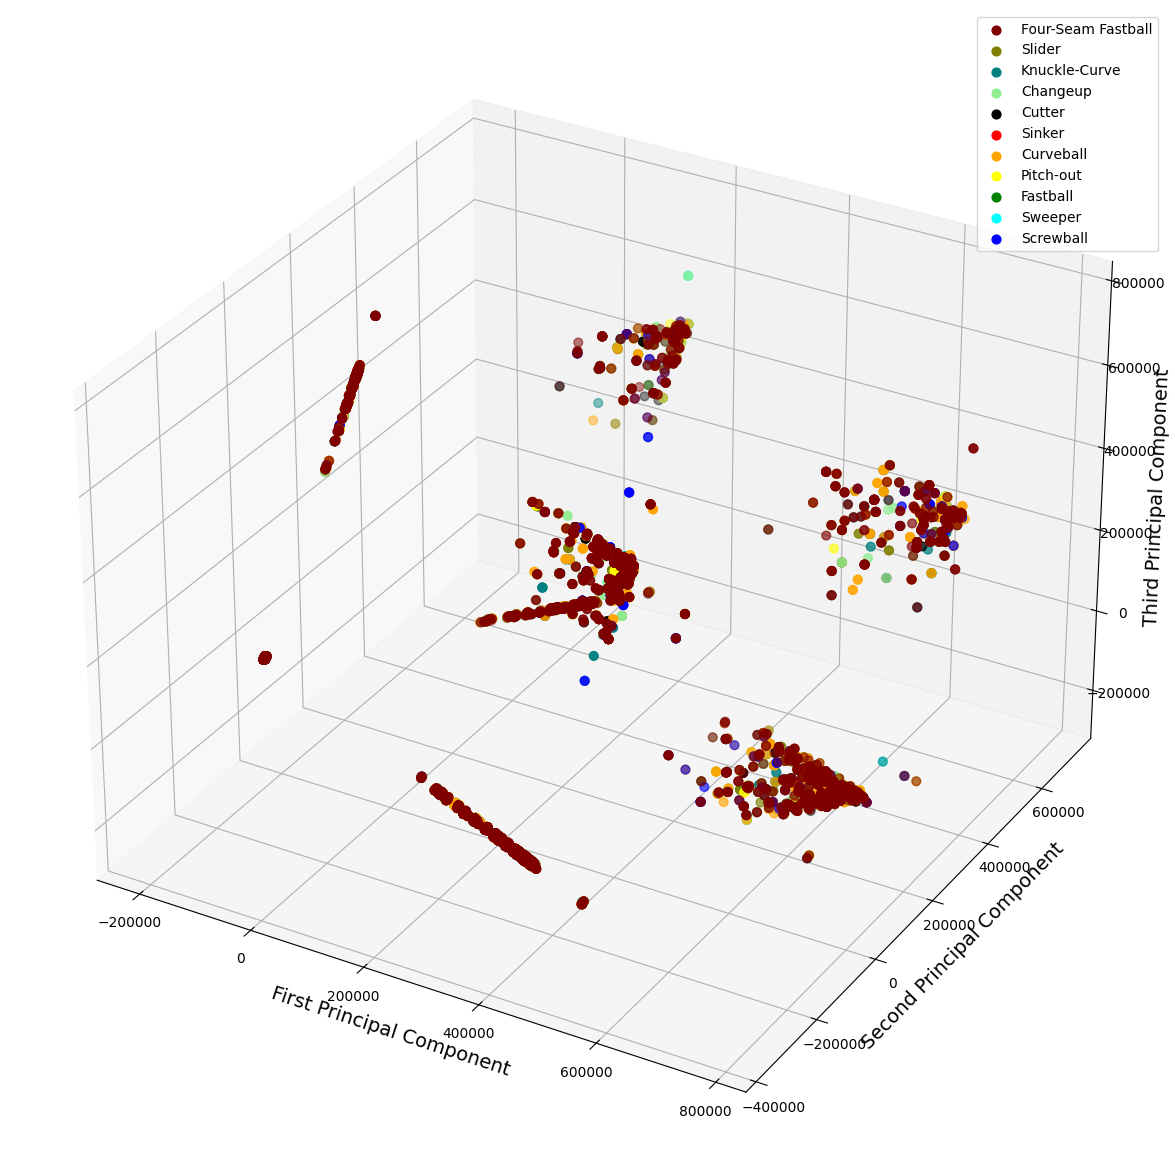

In [26]:
#3-D representation of the PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=11)
pca.fit(X_train)
X_pca = pca.transform(X_train)

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cdict = {0:'maroon',1:'olive', 2:'teal',3:'lightgreen',4:'black', 5:'red',6:'orange',7:'yellow', 8:'green',9:'cyan',10:'blue'}
labl = {0:'Four-Seam Fastball',1:'Slider', 2:'Knuckle-Curve',3:'Changeup',4:'Cutter', 5:'Sinker',6:'Curveball',7:'Pitch-out', 8:'Fastball',9:'Sweeper',10:'Screwball'}

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y_train):
 ix=np.where(y_train==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40, label=labl[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

In [27]:
from apyori import apriori
rules = apriori(transactions = np.array(df_reg_filtered.astype(str)), min_support = 0.1, min_confidence = 0.3, min_lift = 3, min_length = 2, max_length = 5)

In [28]:
def inspect(output):
    Left_Hand_Side = [tuple(result[2][0][0])[0] for result in output]
    support = [result[1] for result in output]
    confidence = [result[2][0][2] for result in output]
    lift = [result[2][0][3] for result in output]
    Right_Hand_Side = [tuple(result[2][0][1])[0] for result in output]
    return list(zip(Left_Hand_Side, support, confidence, lift, Right_Hand_Side))

output = list(rules)
output_data = pd.DataFrame(inspect(output), columns = ['Left_Hand_Side', 'Support', 'Confidence', 'Lift', 'Right_Hand_Side'])
print(output_data)

     Left_Hand_Side   Support  Confidence      Lift Right_Hand_Side
0            455117  0.107187    0.616236  5.560290          514888
1            455117  0.141746    0.814920  5.406930          547989
2            455117  0.171495    0.985947  5.399542          608324
3            455117  0.106797    0.613993  5.498770          643289
4            455117  0.161223    0.926895  5.456095          663656
...             ...       ...         ...       ...             ...
5215         681082  0.113896    0.566404  4.088910            <NA>
5216         681082  0.118525    0.589422  4.100364        Standard
5217         681082  0.189307    0.941420  4.127137        Standard
5218         681082  0.112986    0.561878  4.104781        Standard
5219         682998  0.180362    0.984388  4.443671            <NA>

[5220 rows x 5 columns]


In [29]:
# importing the required module
from mlxtend.preprocessing import TransactionEncoder
# initializing the transactionEncoder
te = TransactionEncoder()
te_ary = te.fit(np.array(df_reg_filtered.astype(str))).transform(np.array(df_reg_filtered.astype(str)))
dataset = pd.DataFrame(te_ary, columns=te.columns_)
# dataset after encoded
dataset

,-0.41,-0.42,-0.43,-0.45,-0.46,-0.48,-0.49,-0.51,-0.53,-0.54,...,Sweeper,TB,TEX,TOR,"Valdez, Framber","Verlander, Justin",WSH,"Wheeler, Zack",X,nan
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38451,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
38452,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
38453,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
38454,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [30]:
# importing the required module
from mlxtend.frequent_patterns import apriori, association_rules

# Extracting the most frequest itemsets via Mlxtend.
# The length column has been added to increase ease of filtering.
frequent_itemsets = apriori(dataset, min_support=0.1, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
# printing the frequent itemset
frequent_itemsets

,support,itemsets,length
0,0.913226,(0),1
1,0.914240,(1),1
2,0.838153,(2),1
3,0.509049,(3),1
4,0.376742,(4),1
...,...,...,...
15318,0.102299,"(PHI, 664761, 0, <NA>, 592206, R, 681082, 5926...",10
15319,0.103443,"(455117, HOU, 608324, 2, <NA>, R, 665161, 1, 6...",10
15320,0.101961,"(PHI, 2, 1, <NA>, R, 592206, 681082, 592663, 6...",10
15321,0.103911,"(455117, HOU, 608324, 547989, <NA>, R, 665161,...",10


In [31]:
frequent_itemsets[(frequent_itemsets['length'] >= 2) &
                    (frequent_itemsets['support'] >= 0.2) & (frequent_itemsets['support'] <= 0.5) &
                    (frequent_itemsets['itemsets'].str.contains("4-Seam Fastball", regex=False)==True)]

,support,itemsets,length
55,0.325671,"(0, 4-Seam Fastball)",2
99,0.323955,"(1, 4-Seam Fastball)",2
143,0.290514,"(2, 4-Seam Fastball)",2
202,0.349282,"(<NA>, 4-Seam Fastball)",2
205,0.353157,"(R, 4-Seam Fastball)",2
...,...,...,...
8538,0.230341,"(0, 2, R, 1, Standard, 4-Seam Fastball)",6
8784,0.285391,"(0, <NA>, R, 1, Standard, 4-Seam Fastball)",6
9260,0.253198,"(0, 2, <NA>, R, Standard, 4-Seam Fastball)",6
10194,0.249740,"(2, <NA>, R, 1, Standard, 4-Seam Fastball)",6


In [32]:
print(frequent_itemsets.nlargest(n = 5, columns = 'support'))

      support          itemsets  length
34   0.984762            (<NA>)       1
48   0.983072        (Standard)       1
45   0.968353               (R)       1
397  0.968067  (<NA>, Standard)       2
394  0.953583         (<NA>, R)       2


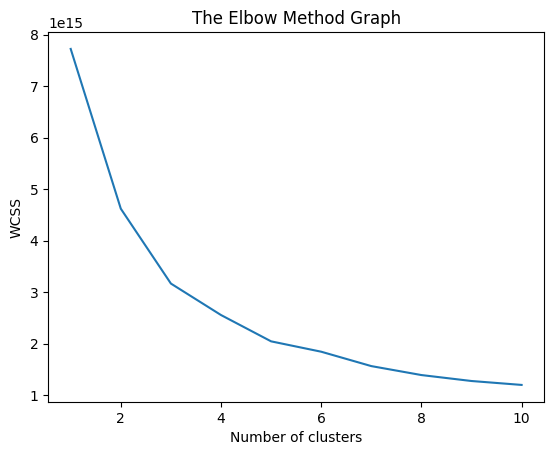

In [33]:
#Trying out the elbow curve to get the number of important features/clusters to form

from sklearn.cluster import KMeans

wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

MODELS

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

model = MultinomialNB()

model.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)
print("accuracy:", accuracy_score(y_train, y_train_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5,
                          return_train_score=True, scoring="accuracy")

grid_search.fit(X_train, y_train)

In [ ]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

In [ ]:
import multiprocessing
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, make_scorer

nb = MultinomialNB(**grid_search.best_params_)
nb.fit(X_train, y_train)
test_score = nb.score(X_test, y_test)

y_pred = nb.predict(X_test)
y_pred_prob = nb.predict_proba(X_test)

print("Test accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))
print("Precision score:", precision_score(y_test, y_pred, average='weighted'))
print("Recall score:", recall_score(y_test, y_pred, average='weighted'))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [11,15,17,19],
    'min_samples_leaf': [5, 10, 20],
    'min_samples_split': [10, 15, 20]
}
scorers = {
    'accuracy_score': make_scorer(accuracy_score)
}

rf_vec_gs = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid ,
        scoring=scorers, cv=10, n_jobs=multiprocessing.cpu_count(), verbose=1, refit='accuracy_score')

rf_vec_gs.fit(X_train, y_train)

rf_vec_best = rf_vec_gs.best_estimator_
rf_vec_best.fit(X_train, y_train)

print('Best model: %s' % str(rf_vec_gs.best_params_))
print('Best score: %f' % rf_vec_gs.best_score_)
print('Best test accuracy: %f' % rf_vec_best.score(X_test, y_test))

In [ ]:
import multiprocessing
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, make_scorer

rf = RandomForestClassifier(**rf_vec_gs.best_params_)
rf.fit(X_train, y_train)
test_score = rf.score(X_test, y_test)

y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)

print("Test accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))
print("Precision score:", precision_score(y_test, y_pred, average='weighted'))
print("Recall score:", recall_score(y_test, y_pred, average='weighted'))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [2,4,7,11,15,18,20],
              'metric': ["euclidean", "manhattan", "minkowski"]}

knn_grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5,
                          return_train_score=True, verbose=1, scoring='accuracy')

knn_grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(knn_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(knn_grid_search.best_score_))

In [ ]:
optimal_knn_model = KNeighborsClassifier(**knn_grid_search.best_params_)
optimal_knn_model.fit(X_train, y_train)

y_pred = optimal_knn_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

print("Test accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))
print("Precision score:", precision_score(y_test, y_pred, average='weighted'))
print("Recall score:", recall_score(y_test, y_pred, average='weighted'))

In [34]:
import optuna
from sklearn.svm import SVC

def objective(trial):
    # Define the hyperparameters to search
    C = trial.suggest_float('C', 1e-4, 1e4)
    gamma = trial.suggest_float('gamma', 1e-4, 1e4)
    kernel = trial.suggest_categorical('kernel', ['rbf'])
    
    # Create the SVM classifier with the suggested hyperparameters
    clf = SVC(C=C, gamma=gamma, kernel=kernel)
    
    # Train the classifier and evaluate on the validation set
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    
    return accuracy

# Run the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2023-12-07 00:20:16,742] A new study created in memory with name: no-name-dfbdd233-0f7c-4c2c-b08f-7472a8c8ff7a
[I 2023-12-07 00:25:18,514] Trial 0 finished with value: 0.35017652250661957 and parameters: {'C': 9079.978554989002, 'gamma': 9030.22720179798, 'kernel': 'rbf'}. Best is trial 0 with value: 0.35017652250661957.
[I 2023-12-07 00:30:20,152] Trial 1 finished with value: 0.35017652250661957 and parameters: {'C': 8557.20241509956, 'gamma': 3299.545661538305, 'kernel': 'rbf'}. Best is trial 0 with value: 0.35017652250661957.
[I 2023-12-07 00:35:21,168] Trial 2 finished with value: 0.35017652250661957 and parameters: {'C': 636.5958015966891, 'gamma': 2152.658764124679, 'kernel': 'rbf'}. Best is trial 0 with value: 0.35017652250661957.
[I 2023-12-07 00:40:23,904] Trial 3 finished with value: 0.35017652250661957 and parameters: {'C': 214.19933471252855, 'gamma': 1235.0098300620202, 'kernel': 'rbf'}. Best is trial 0 with value: 0.35017652250661957.
[I 2023-12-07 00:45:26,212] Trial 

In [35]:
# Print the best hyperparameters and the corresponding accuracy
best_params = study.best_params
best_accuracy = study.best_value
print('Best Hyperparameters:', best_params)
print('Best Accuracy:', best_accuracy)

Best Hyperparameters: {'C': 9079.978554989002, 'gamma': 9030.22720179798, 'kernel': 'rbf'}
Best Accuracy: 0.35017652250661957


In [36]:
import multiprocessing
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, make_scorer

svc = SVC(**study.best_params)
svc.fit(X_train, y_train)
test_score = svc.score(X_test, y_test)

y_pred = svc.predict(X_test)

print("Test accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))
print("Precision score:", precision_score(y_test, y_pred, average='weighted'))
print("Recall score:", recall_score(y_test, y_pred, average='weighted'))

Test accuracy: 0.35017652250661957
F1 score: 0.18164083713613507
Precision score: 0.12262359691482903
Recall score: 0.35017652250661957


/Users/kishan/Documents/Documents/IST 707 Applied Machine Learning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


INDIVIDUAL PITCHERS

In [126]:
nola_reg_filtered = df_reg_filtered[df_reg_filtered['pitcher'].isin([605400])]
nola_post_filtered = df_post_filtered[df_post_filtered['pitcher'].isin([605400])]

gallen_reg_filtered = df_reg_filtered[df_reg_filtered['pitcher'].isin([668678])]
gallen_post_filtered = df_post_filtered[df_post_filtered['pitcher'].isin([668678])]

montgomery_reg_filtered = df_reg_filtered[df_reg_filtered['pitcher'].isin([656756])]
montgomery_post_filtered = df_post_filtered[df_post_filtered['pitcher'].isin([656756])]

In [127]:
X_train_nola, y_train_nola = nola_reg_filtered.iloc[:,nola_reg_filtered.columns!= 'pitch_name'], nola_reg_filtered.iloc[:,nola_reg_filtered.columns== 'pitch_name']
X_test_nola, y_test_nola = nola_post_filtered.iloc[:,nola_post_filtered.columns!= 'pitch_name'], nola_post_filtered.iloc[:,nola_post_filtered.columns== 'pitch_name']

X_train_gallen, y_train_gallen = gallen_reg_filtered.iloc[:,gallen_reg_filtered.columns!= 'pitch_name'], gallen_reg_filtered.iloc[:,gallen_reg_filtered.columns== 'pitch_name']
X_test_gallen, y_test_gallen = gallen_post_filtered.iloc[:,gallen_post_filtered.columns!= 'pitch_name'], gallen_post_filtered.iloc[:,gallen_post_filtered.columns== 'pitch_name']

X_train_montgomery, y_train_montgomery = montgomery_reg_filtered.iloc[:,montgomery_reg_filtered.columns!= 'pitch_name'], montgomery_reg_filtered.iloc[:,montgomery_reg_filtered.columns== 'pitch_name']
X_test_montgomery, y_test_montgomery = montgomery_post_filtered.iloc[:,montgomery_post_filtered.columns!= 'pitch_name'], montgomery_post_filtered.iloc[:,montgomery_post_filtered.columns== 'pitch_name']

In [128]:
#Using Label Encoder, change all categorical data types to numerical
from sklearn.preprocessing import MinMaxScaler
le = LabelEncoder()

for col in ['player_name', 'stand', 'p_throws', 'home_team', 'away_team',
            'type', 'if_fielding_alignment', 'of_fielding_alignment']:
    X_train_nola.loc[:,col] = le.fit_transform(X_train_nola[col])
    X_test_nola.loc[:,col] = le.fit_transform(X_test_nola[col])
    
    X_train_gallen.loc[:,col] = le.fit_transform(X_train_gallen[col])
    X_test_gallen.loc[:,col] = le.fit_transform(X_test_gallen[col])
    
    X_train_montgomery.loc[:,col] = le.fit_transform(X_train_montgomery[col])
    X_test_montgomery.loc[:,col] = le.fit_transform(X_test_montgomery[col])
    
X_train_nola.loc[:,'release_pos_x'] = MinMaxScaler().fit_transform(X_train_nola[['release_pos_x']]).flatten()
X_train_nola.loc[:,'release_pos_z'] = MinMaxScaler().fit_transform(X_train_nola[['release_pos_z']]).flatten()
X_test_nola.loc[:,'release_pos_x'] = MinMaxScaler().fit_transform(X_test_nola[['release_pos_x']]).flatten()
X_test_nola.loc[:,'release_pos_z'] = MinMaxScaler().fit_transform(X_test_nola[['release_pos_z']]).flatten()
X_train_nola = X_train_nola.fillna(0)
X_test_nola = X_test_nola.fillna(0)
y_train_nola = le.fit_transform(np.ravel(y_train_nola))

X_train_gallen.loc[:,'release_pos_x'] = MinMaxScaler().fit_transform(X_train_gallen[['release_pos_x']]).flatten()
X_train_gallen.loc[:,'release_pos_z'] = MinMaxScaler().fit_transform(X_train_gallen[['release_pos_z']]).flatten()
X_test_gallen.loc[:,'release_pos_x'] = MinMaxScaler().fit_transform(X_test_gallen[['release_pos_x']]).flatten()
X_test_gallen.loc[:,'release_pos_z'] = MinMaxScaler().fit_transform(X_test_gallen[['release_pos_z']]).flatten()
X_train_gallen = X_train_gallen.fillna(0)
X_test_gallen = X_test_gallen.fillna(0)
y_train_gallen = le.fit_transform(np.ravel(y_train_gallen))

X_train_montgomery.loc[:,'release_pos_x'] = MinMaxScaler().fit_transform(X_train_montgomery[['release_pos_x']]).flatten()
X_train_montgomery.loc[:,'release_pos_z'] = MinMaxScaler().fit_transform(X_train_montgomery[['release_pos_z']]).flatten()
X_test_montgomery.loc[:,'release_pos_x'] = MinMaxScaler().fit_transform(X_test_montgomery[['release_pos_x']]).flatten()
X_test_montgomery.loc[:,'release_pos_z'] = MinMaxScaler().fit_transform(X_test_montgomery[['release_pos_z']]).flatten()
X_train_montgomery = X_train_montgomery.fillna(0)
X_test_montgomery = X_test_montgomery.fillna(0)
y_train_montgomery = le.fit_transform(np.ravel(y_train_montgomery))

In [143]:
X_test_nola.iloc[2]

release_pos_x            0.724638
release_pos_z            0.673077
player_name                   0.0
batter                   682998.0
pitcher                  605400.0
stand                         0.0
p_throws                      0.0
home_team                     0.0
away_team                     1.0
type                          2.0
balls                         2.0
strikes                       2.0
on_3b                         0.0
on_2b                         0.0
on_1b                         0.0
outs_when_up                  1.0
inning                        5.0
game_pk                  748539.0
pitcher.1                605400.0
fielder_2.1              592663.0
fielder_3                547180.0
fielder_4                681082.0
fielder_5                664761.0
fielder_6                607208.0
fielder_7                669016.0
fielder_8                679032.0
fielder_9                592206.0
at_bat_number                37.0
pitch_number                  8.0
home_score    

In [139]:
#Trying to predict a pitch type based on some input
pitch_to_predict = X_test_nola.iloc[2]

rf_nola = rf_vec_best.fit(X_train_nola.values, y_train_nola)
print("Nola: %s" % (df_reg_filtered['pitch_name'].unique()[rf_nola.predict([pitch_to_predict])[0]]))

rf_gallen = rf_vec_best.fit(X_train_gallen.values, y_train_gallen)
print("Gallen: %s" % (df_reg_filtered['pitch_name'].unique()[rf_gallen.predict([pitch_to_predict])[0]]))

rf_montgomery = rf_vec_best.fit(X_train_montgomery.values, y_train_montgomery)
print("Montgomery: %s" % (df_reg_filtered['pitch_name'].unique()[rf_montgomery.predict([pitch_to_predict])[0]]))

Nola: Changeup
Gallen: 4-Seam Fastball
Montgomery: Cutter
